In [1]:

# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy.sql import operators, extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
print(results)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [5]:
#  3. Convert the June temperatures to a list.
temps = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
print(temps)

[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(temps)
print(df)

         0
0     78.0
1     76.0
2     78.0
3     76.0
4     77.0
...    ...
1695  79.0
1696  74.0
1697  74.0
1698  76.0
1699  75.0

[1700 rows x 1 columns]


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,0
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [8]:
# Deliverable 3: Additional Query (Average daily Precip. for June across years 2010-2016)
import statistics

precip_day = []
day_avg = []

for x in range (1, 31):
    precip_day.append(session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 6 , extract('day', Measurement.date) == x).all())
    
for p in range (0,30):
    y = pd.DataFrame(precip_day[p]).mean()
    day_avg.append(y)

d_df = pd.DataFrame(day_avg)
d_df.index += 1
print(d_df)

           0
1   0.199245
2   0.119423
3   0.180000
4   0.279412
5   0.194231
6   0.082308
7   0.076923
8   0.044423
9   0.084528
10  0.093091
11  0.099800
12  0.113269
13  0.070943
14  0.141887
15  0.129608
16  0.078235
17  0.134107
18  0.117143
19  0.119649
20  0.164815
21  0.160755
22  0.165192
23  0.155556
24  0.156792
25  0.236604
26  0.231569
27  0.122549
28  0.097917
29  0.150784
30  0.088400


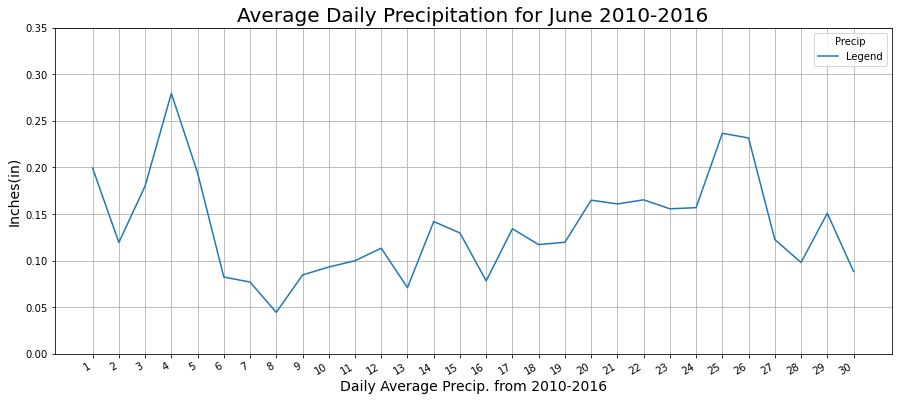

In [11]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

precip = d_df
fig, ax = plt.subplots(figsize=(15, 6))
ax.set_title('Average Daily Precipitation for June 2010-2016',fontsize=20)
ax.set_xlabel('Daily Average Precip. from 2010-2016',fontsize=14)
ax.set_ylabel('Inches(in)',fontsize=14)
ax.plot(precip, label = "Legend")
ax.set_yticks(np.arange(0, .4, step=.05))
ax.grid(1)
ax.legend(title = 'Precip')
ax.set_xticks(np.arange(1,31, step=1))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')  

## D2: Determine the Summary Statistics for December

In [16]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results_dec = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [17]:
# 7. Convert the December temperatures to a list.
temps_dec = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [18]:

# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_dec = pd.DataFrame(temps_dec)
print(df_dec)

         0
0     76.0
1     74.0
2     74.0
3     64.0
4     64.0
...    ...
1512  71.0
1513  71.0
1514  69.0
1515  65.0
1516  65.0

[1517 rows x 1 columns]


In [19]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_dec.describe()

,0
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [20]:
######################################################################
#                              Test Cell                             #
######################################################################

results_dec_prcp = session.query(Measurement.date, Measurement.tobs, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
df_dec_prcp = pd.DataFrame(results_dec_prcp, columns=['date','temp','precipitation'])
df_dec_prcp

,date,temp,precipitation
0,2010-12-01,76.0,0.04
1,2010-12-03,74.0,0.00
2,2010-12-04,74.0,0.00
3,2010-12-06,64.0,0.00
4,2010-12-07,64.0,0.00
...,...,...,...
1512,2016-12-27,71.0,0.14
1513,2016-12-28,71.0,0.14
1514,2016-12-29,69.0,1.03
1515,2016-12-30,65.0,2.37


<AxesSubplot:>

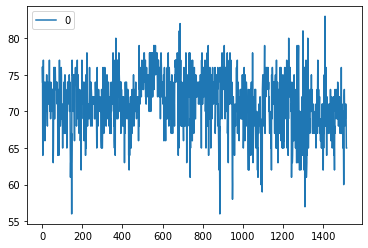

In [21]:
######################################################################
#                          Visualize data                            #
######################################################################
df_dec_prcp.set_index(df_dec_prcp['date'], inplace=True)
df_dec_prcp = df_dec_prcp.sort_index()
df_dec.plot()

In [25]:
######################################################################
#                              Test Cell                             #
######################################################################
test_df = pd.DataFrame(precip_day[1])
print(test_df.mean())

0    0.119423
dtype: float64


In [26]:
# Deliverable 3: Additional Query (Average daily Precip. for December across years 2010-2016)
import statistics

precip_day_dec = []
day_avg_dec = []

for x in range (1, 32):
    precip_day_dec.append(session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 12 , extract('day', Measurement.date) == x).all())
    
for p in range (0,31):
    y = pd.DataFrame(precip_day_dec[p]).mean()
    day_avg_dec.append(y)

dec_prcp_df = pd.DataFrame(day_avg_dec)
dec_prcp_df.index += 1
print(dec_prcp_df)

           0
1   0.172609
2   0.321489
3   0.246122
4   0.180204
5   0.120000
6   0.046383
7   0.022273
8   0.041064
9   0.106522
10  0.414898
11  0.263673
12  0.170417
13  0.348600
14  0.215417
15  0.102128
16  0.250000
17  0.100000
18  0.151087
19  0.631489
20  0.686818
21  0.251500
22  0.120244
23  0.315682
24  0.170227
25  0.299474
26  0.305750
27  0.125333
28  0.135349
29  0.086977
30  0.128140
31  0.176250


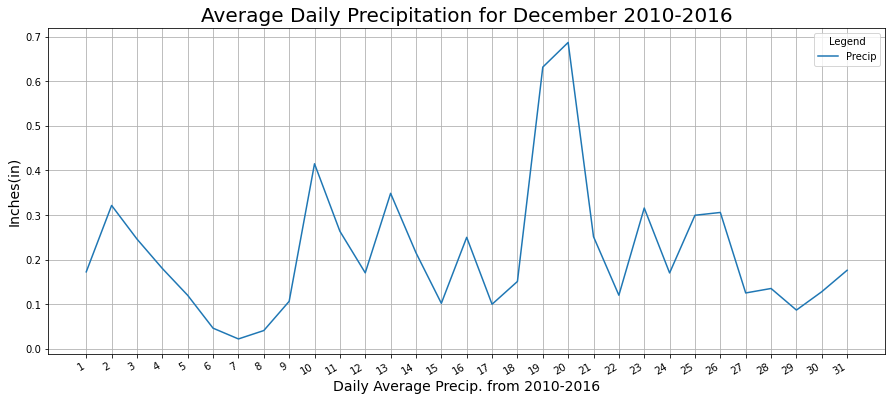

In [27]:
# Deliverable 3: Additional Query Visualization (Average daily Precip. for December across years 2010-2016)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

precip = dec_prcp_df
fig, ax = plt.subplots(figsize=(15, 6))
ax.set_title('Average Daily Precipitation for December 2010-2016',fontsize=20)
ax.set_ylabel('Inches(in)',fontsize=14)
ax.set_xlabel('Daily Average Precip. from 2010-2016',fontsize=14)
ax.plot(precip, label = "Precip")
ax.set_yticks(np.arange(0, .8, step=.1))
ax.grid(1)
ax.legend(title = 'Legend')
ax.set_xticks(np.arange(1,32, step=1))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')        